# Introduction to quantum programming

In [58]:
############### Needed imports list ##################
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import matplotlib.pyplot as plt
from qiskit.tools.visualization import *
from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer
from PIL import Image
from qiskit.quantum_info import Statevector

Here is a simple quality of life function I use throughout the program to run the circuits.

In [59]:
def work(qc):
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result()
    return result.get_counts(qc), result.get_statevector(qc)

## 1. 4 Random bytes

In this section we will use utilize one of the quantum bits' most important features, the ability to generate truly random numbers. In this case our aim will be to generate 4 random bytes of information. First we will need to generate 1 random quantum bit, to do this we must first define the quantum bit:

In [37]:
bit_q = QuantumRegister(1, name='bitq')

This is our quantum bit named bitq which is how it will appear in our diagrams. Next in order to read this bit we will also need a normal digital bit so that we are able to measure bitq and lock it into an absolute state of either 0 or 1. 

In [38]:
bit_d = ClassicalRegister(1, name='bitd')

Now we must define our circuit, this is the environment where all of our operations will take place. 

In [39]:
qc = QuantumCircuit(bit_q, bit_d)

Then we will use reset on bitq in order to write the value of |0> into all of the bits so they all have the same starting point.

In [40]:
qc.reset(bit_q) 

Next we begin to actually manipulate the bits, as we are only interested in generating random values at this point will we use the HAD operation which places the quantum bits into an equal superposition of 0 and 1 meaning there is a 50/50 chance of the value of the bit being read as either 0 or 1, once the value of the bit is read it cannot be changed.

In [41]:
qc.h(bit_q)

Now we perform the last operation on this circuit which is to read the results of the quantum bit as a digital bit.

In [42]:
qc.measure(bit_q, bit_d)


And finally we run the circuits and get the results.

In [43]:
results = work(qc)
counts = results[0]
print('Your random bit is: {0}'.format(list(counts.keys())[0]))
qc.draw(output='text')

Your random bit is: 0


┌───┐┌─┐
bitq_0: ─|0>─┤ H ├┤M├
             └───┘└╥┘
bitd: 1/═══════════╩═
                   0

If you run the above a few times you will see that the value of the random bit changes hence we have succeeded in the first part of our task. Below the results you can see a small diagram of our circuit to help with visualisation (just remove the line qc.darw() is you don't what to see the diagram in future sections). 

Now onto generating our 4 random bytes of information.

In [44]:
for i in range(0, 4):
    bit_q = QuantumRegister(8, name='bitq')
    bit_d = ClassicalRegister(8, name='bitd')
    qc = QuantumCircuit(bit_q, bit_d)
    qc.reset(bit_q)
    qc.h(bit_q) 
    qc.measure(bit_q, bit_d) 
    results = work(qc)
    counts = results[0]
    print('Your random byte is: {0}'.format(list(counts.keys())[0]))
qc.draw(output='text')

Your random byte is: 00001000
Your random byte is: 11011100
Your random byte is: 11100000
Your random byte is: 11001101


┌───┐┌─┐                     
bitq_0: ─|0>─┤ H ├┤M├─────────────────────
             ├───┤└╥┘┌─┐                  
bitq_1: ─|0>─┤ H ├─╫─┤M├──────────────────
             ├───┤ ║ └╥┘┌─┐               
bitq_2: ─|0>─┤ H ├─╫──╫─┤M├───────────────
             ├───┤ ║  ║ └╥┘┌─┐            
bitq_3: ─|0>─┤ H ├─╫──╫──╫─┤M├────────────
             ├───┤ ║  ║  ║ └╥┘┌─┐         
bitq_4: ─|0>─┤ H ├─╫──╫──╫──╫─┤M├─────────
             ├───┤ ║  ║  ║  ║ └╥┘┌─┐      
bitq_5: ─|0>─┤ H ├─╫──╫──╫──╫──╫─┤M├──────
             ├───┤ ║  ║  ║  ║  ║ └╥┘┌─┐   
bitq_6: ─|0>─┤ H ├─╫──╫──╫──╫──╫──╫─┤M├───
             ├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
bitq_7: ─|0>─┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├
             └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
bitd: 8/═══════════╩══╩══╩══╩══╩══╩══╩══╩═
                   0  1  2  3  4  5  6  7

Hopefully you can see what's going on here, instead of 1 bit were are working with 8 i.e. a byte and the whole process is wrapped in a for loop so that we can generate 4 of them.

## 2. Creating the NOT function


In this section we will recreate the NOT function found in conventional logic, however before that, some needed background information. When the HAD operation is performed on a qubit with a value of |1> its relative phase gets rotated 180 degrees, and the HAD function is that it is it's own inverse, therefore performing it twice will reverse its effect. 

To create and demonstrate the NOT function we start by making circuit of 2 qubits and have them both be |0> by default the 1st bit will be our control bit which will remain at 0 and the 2nd will be our test bit.

In [45]:
bit_q = QuantumRegister(2, name='bitq')
bit_d = ClassicalRegister(2, name='bitd')
qc = QuantumCircuit(bit_q, bit_d)
qc.reset(bit_q)
qc.measure(bit_q[0], bit_d[0])

Next we target the 2nd qubit and perform HAD to place it in a state of equal superposition, then manually rotate the qubit 180 degrees and reverse the HAD by performing it again. 

In [46]:
qc.h(bit_q[1])
qc.rz(math.radians(180), bit_q[1])
qc.h(bit_q[1])

Finally we read the 2nd qubit, and make a plot to visualize the change.

             ┌─┐                       
bitq_0: ─|0>─┤M├───────────────────────
             └╥┘┌───┐┌────────┐┌───┐┌─┐
bitq_1: ─|0>──╫─┤ H ├┤ RZ(pi) ├┤ H ├┤M├
              ║ └───┘└────────┘└───┘└╥┘
bitd: 2/══════╩══════════════════════╩═
              0                      1 


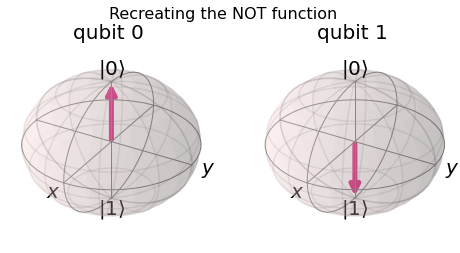

In [47]:
qc.measure(bit_q[1], bit_d[1])
results = work(qc)
print(qc.draw(output='text'))
plot_bloch_multivector(results[1], 'Recreating the NOT function')

Excellent so we know it works now we can put it into an easy to access function incase we want to use it later.

In [48]:
def NOT(qc, bits):
    qc.h(bits)
    qc.rz(math.radians(180), bits)
    qc.h(bits)

As this is essentially just a series of circuit instructions we are calling there is no need to return anything, however, you can do so if you wish.

## 3. Root-of-not 

The root-of-not is defined as a function which when applied twice results in a not operation, taking what we found out
earlier creating the not function we can see that all we need to do to get this root of not function is to perform 1/2
of the operation e.g.  only changing the phase by 90 degrees at a time. Here I will use 3 qubits to better illustrate what
is happening at each stage of the process.


In [55]:
bit_q = QuantumRegister(3, name='bitq')
bit_d = ClassicalRegister(2, name='bitd')
qc = QuantumCircuit(bit_q, bit_d)
qc.reset(bit_q)

Next, in order to simply the operations I will adapt the NOT function we created earlier to add in the functionality of root-NOT. 

In [56]:
def NOT(qc, bits, arg='not'):
    qc.h(bits)
    if arg.lower() == 'root':
        qc.rz(math.radians(90), bits)
    else:
        qc.rz(math.radians(180), bits)
    qc.h(bits)

As you can see the only thing changed is the ability to specify the 'root' argument which only performs 'half' the NOT operation.

Now we will keep the control bit as is, perform root-NOT once on the 2nd bit and twice on the 3rd bit, then see the effects.

             ┌─┐                                               
bitq_0: ─|0>─┤M├───────────────────────────────────────────────
             └╥┘┌───┐┌──────────┐┌───┐                         
bitq_1: ─|0>──╫─┤ H ├┤ RZ(pi/2) ├┤ H ├─────────────────────────
              ║ ├───┤├──────────┤├───┤┌───┐┌──────────┐┌───┐┌─┐
bitq_2: ─|0>──╫─┤ H ├┤ RZ(pi/2) ├┤ H ├┤ H ├┤ RZ(pi/2) ├┤ H ├┤M├
              ║ └───┘└──────────┘└───┘└───┘└──────────┘└───┘└╥┘
bitd: 2/══════╩══════════════════════════════════════════════╩═
              0                                              1 


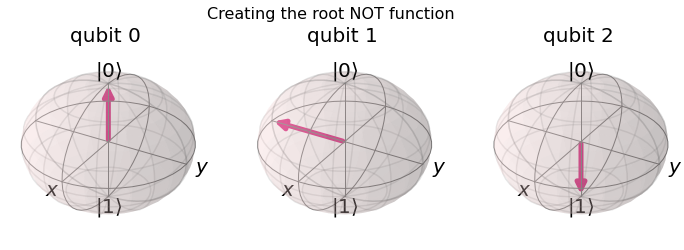

In [57]:
qc.measure(bit_q[0], bit_d[0])
NOT(qc, bit_q[1], 'root')
NOT(qc, bit_q[2], 'root')
NOT(qc, bit_q[2], 'root')
qc.measure(bit_q[2], bit_d[1])
results = work(qc)
print(qc.draw())
plot_bloch_multivector(results[1], 'Creating the root NOT function')

Notice I did not the 2nd qubit and force it into a digital bit 1/0 state, this was so that I could show the interesting in-between state that occurs in the bit after performing 1 of the root-NOT operations. 